In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_df = pd.read_csv('../../data/processed/netstats/netstats-threshold-0.5.csv', parse_dates=['date'])
original_df.head()

,date,density,global_cc
0,2020-01-30,0.193060,0.115381
1,2020-01-31,0.199320,0.116169
2,2020-02-01,0.211956,0.119353
3,2020-02-02,0.202179,0.119581
4,2020-02-03,0.184945,0.116071


In [4]:
comparsion_df = original_df.copy()
for threshold in [0.4, 0.6]:
    gittered_df = pd.read_csv(f'../../data/processed/netstats/netstats-threshold-{threshold}.csv', parse_dates=['date'])
    comparsion_df = comparsion_df.merge(gittered_df, how='inner', on='date', suffixes=[None, f'_{threshold}'])
comparsion_df.head()

,date,density,global_cc,density_0.4,global_cc_0.4,density_0.6,global_cc_0.6
0,2020-01-30,0.193060,0.115381,0.257864,0.131597,0.142747,0.096700
1,2020-01-31,0.199320,0.116169,0.274480,0.132950,0.144292,0.096419
2,2020-02-01,0.211956,0.119353,0.288392,0.134727,0.146495,0.096697
3,2020-02-02,0.202179,0.119581,0.274403,0.135841,0.142090,0.096442
4,2020-02-03,0.184945,0.116071,0.254386,0.135634,0.131656,0.092988


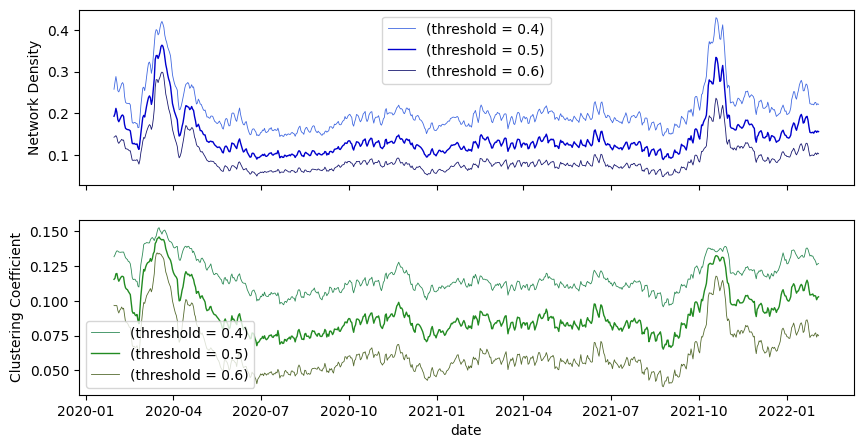

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10, 5))
# fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(13, 6))

# Plot Density
sns.lineplot(x='date', y='density_0.4', data=comparsion_df, ax=ax[0], color="royalblue", linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='density', data=comparsion_df, ax=ax[0], color='mediumblue', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='density_0.6', data=comparsion_df, ax=ax[0], color="midnightblue", linewidth=0.6, label="(threshold = 0.6)")
ax[0].set_ylabel('Network Density')

sns.lineplot(x='date', y='global_cc_0.4', data=comparsion_df, ax=ax[1], color='seagreen', linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='global_cc', data=comparsion_df, ax=ax[1], color='forestgreen', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='global_cc_0.6', data=comparsion_df, ax=ax[1], color='darkolivegreen', linewidth=0.6, label="(threshold = 0.6)")
ax[1].set_ylabel('Clustering Coefficient')

plt.savefig("../../graphs/Figure_02_2_Netstats-Sensitivity_Analysis.pdf", bbox_inches='tight')
plt.savefig("../../graphs/Figure_02_2_Netstats-Sensitivity_Analysis.png", bbox_inches='tight')
plt.show()